### Part 1

In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)

#selecting a specific target for drug discovery, in thise case the acetylcholinesterase for humans
selected_target = targets.target_chembl_id[0]

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

df

KeyboardInterrupt: 

In [ ]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]

df2_nr = df2.drop_duplicates(['canonical_smiles'])

df2_nr

/var/folders/gc/z64s0wbn083_zf55p0508z9h0000gn/T/ipykernel_76363/3862030467.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8825,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963372,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216438,Binding affinity to AChE (unknown origin) asse...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,0.209
8827,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24963385,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5216448,Inhibition of recombinant human AChE using ace...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,nM,UO_0000065,None,274.0
8828,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965328,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,76.2
8829,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24965329,[],CHEMBL5217010,Inhibition of human recombinant AChE using S-a...,B,None,None,BAO_0000190,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,55.0


In [ ]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df3 = df2_nr[selection]

df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0
...,...,...,...
8825,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209
8827,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0
8828,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0
8829,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0


In [ ]:
bioactivity_threshold = []
for i in df3.standard_value:
    if float(i) >= 10000:
        bioactivity_threshold.append("inactive")
    elif float(i) <= 1000:
        bioactivity_threshold.append("active")
    else:
        bioactivity_threshold.append("intermediate")

bioactivity_class= pd.Series(bioactivity_threshold, name='class')
df4 = pd.concat((df3, bioactivity_class), axis=1)

bioactivity_class
print(
    df3.shape,
    bioactivity_class.shape,
    df4.shape
)

df3.reset_index(drop=True, inplace=True)  # Reset index of df3
bioactivity_class.reset_index(drop=True, inplace=True)  # Reset index of bioactivity_class
df4 = pd.concat((df3, bioactivity_class), axis=1)  # Concatenate after resetting indices

df4

(6157, 3) (6157,) (8324, 4)


,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active
...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,active
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,inactive
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,inactive


### Part 2

In [ ]:
df_no_smiles = df4.drop(columns='canonical_smiles')
df_no_smiles

smiles = []
for i in df4.canonical_smiles.tolist():
    cpd = str(i).split('.')
    cpd_longest = max(cpd, key = len)
    smiles.append(cpd_longest)

smiles = pd.Series(smiles, name='canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles, smiles], axis = 1)
df_clean_smiles



,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL133897,750.0,active,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1
1,CHEMBL336398,100.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1
2,CHEMBL131588,50000.0,inactive,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1
3,CHEMBL130628,300.0,active,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F
4,CHEMBL130478,800.0,active,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C
...,...,...,...,...
6152,CHEMBL5219841,0.209,active,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1
6153,CHEMBL5219046,274.0,active,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1
6154,CHEMBL5219594,76200.0,inactive,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1
6155,CHEMBL5219958,55000.0,inactive,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1


***Lipinski Stuff***

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
def lipinski(smiles, verbose = False):
    moldata = []
    for elem in smiles:
        mol = Chem.MolFromSmiles(elem)
        moldata.append(mol)
    baseData = np.arange(1,1)

    i=0
    for mol in moldata:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([
            desc_MolWt,
            desc_MolLogP,
            desc_NumHDonors,
            desc_NumHAcceptors
        ])

        if(i==0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])
        i=i+1
    columnNames = ['MW', 'LogP', 'NumHDonors', 'NumHAcceptors']
    descriptors = pd.DataFrame(data=baseData, columns=columnNames)

    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

df_combined = pd.concat([df4, df_lipinski], axis = 1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active,312.325,2.8032,0.0,6.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active,376.913,4.5546,0.0,5.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive,426.851,5.3574,0.0,5.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active,404.845,4.7069,0.0,5.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active,346.334,3.0953,0.0,6.0
...,...,...,...,...,...,...,...,...
6152,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0
6153,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.0,active,352.478,5.0610,1.0,3.0
6154,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.0,inactive,287.246,2.1994,1.0,4.0
6155,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.0,inactive,311.337,3.1837,1.0,4.0


In [ ]:
df_combined.dropna(inplace=True)
df_combined = df_combined[df_combined['standard_value'] != 0]
df_combined.reset_index(inplace=True, drop=True)

df_combined


,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.000,active,312.325,2.8032,0.0,6.0,750.000
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.000,active,376.913,4.5546,0.0,5.0,100.000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.000,inactive,426.851,5.3574,0.0,5.0,50000.000
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.000,active,404.845,4.7069,0.0,5.0,300.000
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.000,active,346.334,3.0953,0.0,6.0,800.000
...,...,...,...,...,...,...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,0.209,active,390.461,2.8334,2.0,5.0,0.209
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,274.000,active,352.478,5.0610,1.0,3.0,274.000
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,76200.000,inactive,287.246,2.1994,1.0,4.0,76200.000
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,55000.000,inactive,311.337,3.1837,1.0,4.0,55000.000


****Normalization****

In [ ]:
print(-np.log10((10**-9)* 100000000),
-np.log10( (10**-9)* 10000000000 )) 
#You can see how values above 100,000,000 become negative when using this logarithmic transformation. This makes interpretation of drug likeness difficult 
#Therefore we need to handle it.

print(df_combined.standard_value.describe())

#function to cap values at 100,000,000
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
        
    return x


1.0 -1.0
count    6.156000e+03
mean     1.064838e+05
std      9.218820e+05
min      5.000000e-06
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value, dtype: float64


In [ ]:
#IC50 values are not normally distributed, therefore we need to apply negative logarithmic transformation

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = max(i, 1e-9)*(10**-9) # Ensure molar is non-zero and positive, then convert nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
        
    return x

#after
df_norm = norm_value(df_combined)
print(df_norm.standard_value_norm.describe())

df_final = pIC50(df_norm)
df_final

count    6.156000e+03
mean     1.064838e+05
std      9.218820e+05
min      5.000000e-06
25%      1.480000e+02
50%      2.300000e+03
75%      1.700000e+04
max      4.960000e+07
Name: standard_value_norm, dtype: float64


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,active,312.325,2.8032,0.0,6.0,6.124939
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,active,376.913,4.5546,0.0,5.0,7.000000
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,inactive,426.851,5.3574,0.0,5.0,4.301030
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,active,404.845,4.7069,0.0,5.0,6.522879
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,active,346.334,3.0953,0.0,6.0,6.096910
...,...,...,...,...,...,...,...,...
6151,CHEMBL5219841,COc1cccc2c1CCCC2NS(=O)(=O)NC(=O)OCc1ccccc1,active,390.461,2.8334,2.0,5.0,9.679854
6152,CHEMBL5219046,CC[C@@]1(c2cccc(OC(=O)Nc3ccccc3)c2)CCCCN(C)C1,active,352.478,5.0610,1.0,3.0,6.562249
6153,CHEMBL5219594,O=c1[nH]c2ccc(OCc3ccc(F)cc3)cc2c(=O)o1,inactive,287.246,2.1994,1.0,4.0,4.118045
6154,CHEMBL5219958,CC(C)c1ccc(COc2ccc3[nH]c(=O)oc(=O)c3c2)cc1,inactive,311.337,3.1837,1.0,4.0,4.259637


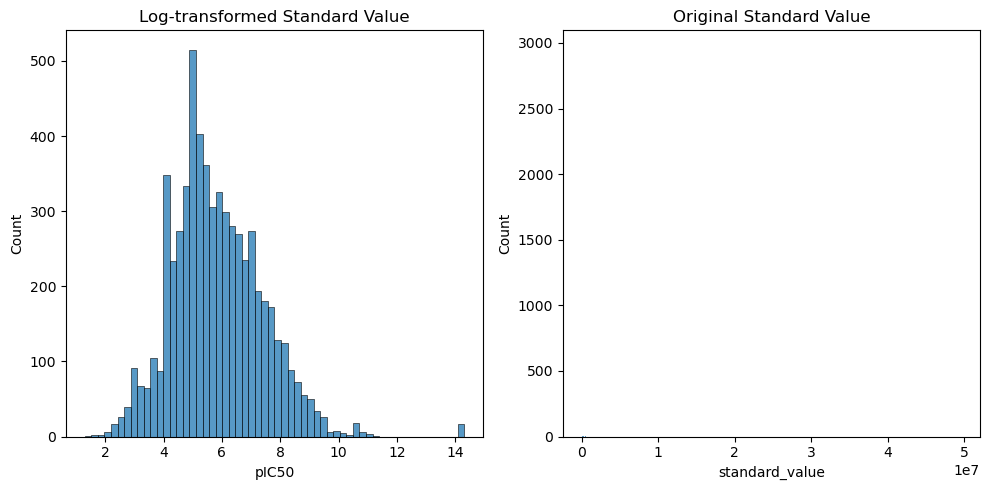

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Convert 'standard_value' column to numeric type, ignoring errors
df_final['pIC50'] = pd.to_numeric(df_final['pIC50'], errors='coerce')
df_combined['standard_value'] = pd.to_numeric(df_combined['standard_value'], errors='coerce')

plt.figure(figsize=(10, 5))  # Adjust figure size for better visualization
plt.subplot(1, 2, 1)  # Create subplots
sns.histplot(x=df_final['pIC50'])
plt.title('Log-transformed Standard Value')  

# Plot the histogram of the original data
plt.subplot(1, 2, 2)  # Create second subplot
sns.histplot(x=df_combined['standard_value'])
plt.title('Original Standard Value')  

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# sns.histplot(x=df_combined['standard_value'])

#Clear need for normalization, seemed to have worked

In [ ]:
df_final.pIC50.describe()
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [ ]:
df_2class = df_final[df_final['class'] != 'intermediate']
df_2class['class']
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')

****Plotting****

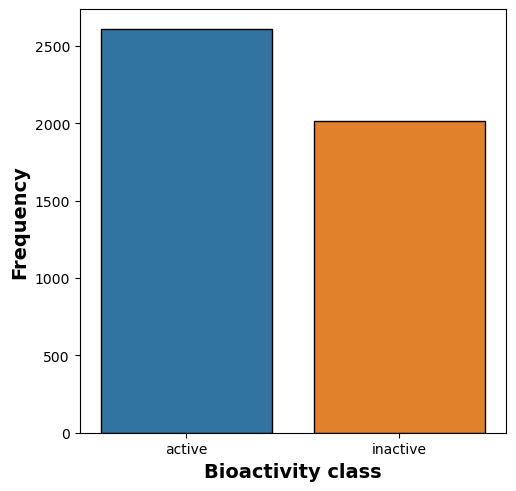

In [ ]:

#Frequency of the two classes
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black', hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

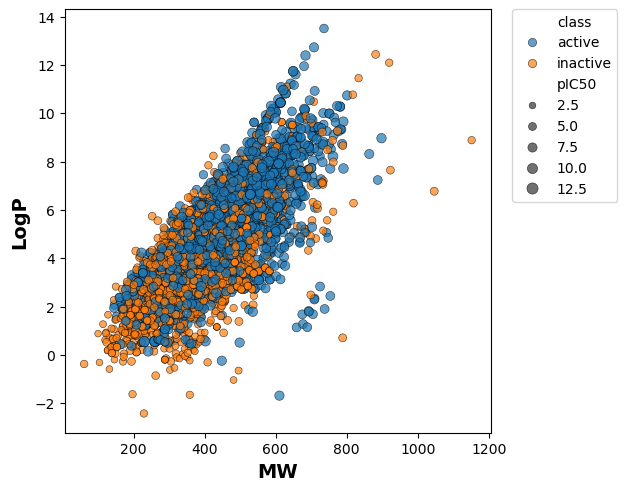

In [ ]:
#Scatterplot of MW vs LogP
plt.figure(figsize=(5.5,5.5))
sns.scatterplot(data=df_2class, x='MW', y='LogP', hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


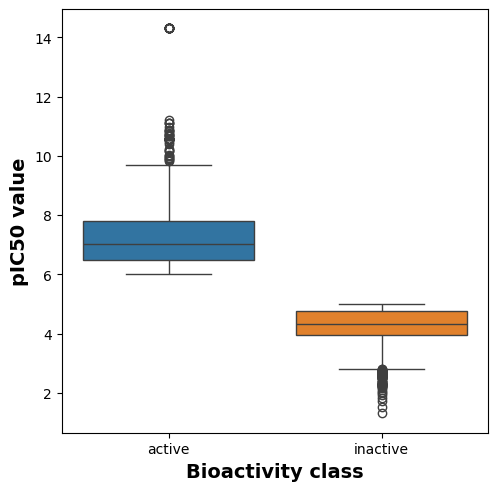

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Testing statistical significance along with plots**

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,5245284.0,0.0,0.05,Different distribution (reject H0)


,Descriptor,Statistics,p,alpha,Interpretation
0,MW,3400942.0,3.360573e-67,0.05,Different distribution (reject H0)


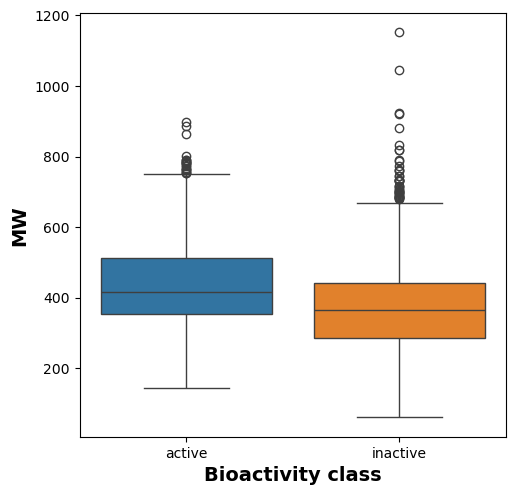

In [ ]:
#MW
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,3529059.5,1.784123e-90,0.05,Different distribution (reject H0)


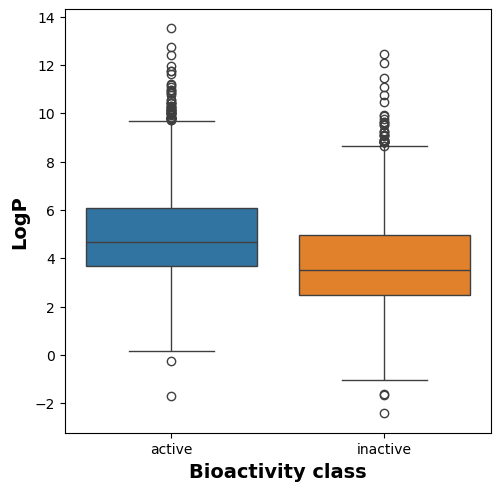

In [ ]:
#LogP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,3002935.0,6.724468e-19,0.05,Different distribution (reject H0)


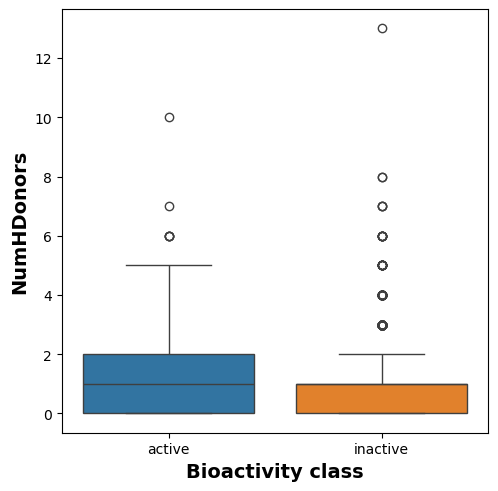

In [ ]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,2824753.5,0.000005,0.05,Different distribution (reject H0)


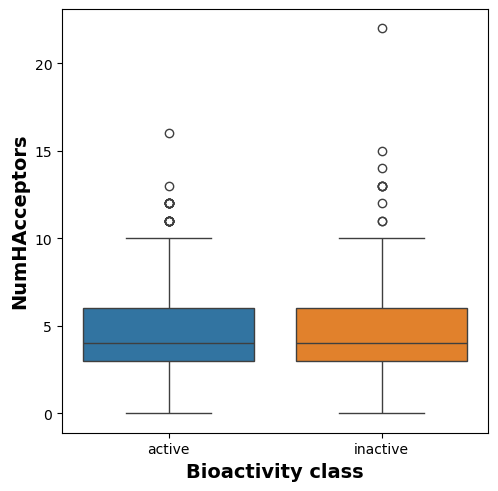

In [ ]:
#NumHAcceptors

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class, hue='class')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

mannwhitney('NumHAcceptors')

##### **Box Plots**

### **pIC50 values**

Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

### **Lipinski's descriptors**

All of the 4 Lipinski's descriptors exhibited ***statistically significant difference*** between the **actives** and **inactives**.

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 10%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_LogP.pdf (deflated 37%)
  adding: plot_MW.pdf (deflated 38%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: plot_NumHAcceptors.pdf (deflated 39%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 80%)
  adding: plot_ic50.pdf (deflated 35%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)


### Part 3: Calculating Fingerprint Descripters Using PaDEL (Predictive Activity-Descriptor Relationship).

##### Previous Lipinski Desciptors give a high level/global description of the compound (i.e molecular weight, hydrogen bond donate/accepting propensity, etc), but these fingerprints give much mor descriptive insights into each component (atom) of the compound and the features it has. Getting a good idea on the properties of these building blocks will give us a good idea on the unique conformation and properties of the compound. Therefore we need to find a way to rearrange these building blocks in a way that provides the  most potency and reducing toxicity (side effects). 

In [ ]:
##Downloading padel software, its a tool used to calculate molecular descriptors (values representing the compound, specifically its structure and physiochemical properties) 
#It is very important for research as it gives us a way to use these structural properties information on various applications (Virtual screening, QSAR) to...predict its activity within the body and ideally with...
#...the target protein, and whether it is an ideal drug for the target. 

# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
# ! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

# ! unzip padel.zip

In [4]:
import pandas as pd
df5 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

df5[df5.isna().any(axis=1)] #no na values in any cell
df5

selection5 = ['canonical_smiles', 'molecule_chembl_id']
df5_selection = df5[selection5]
df5_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [13]:
#Looking at molecule.smi to verify if everything's good
# ! cat molecule.smi | head -5
# ! cat molecule.smi | wc -l #same number as the dataframe rows

#Looking and running padel script
# ! cat padel.sh #you can see how the chemical structure (smiles) is being pre-processed and then descriptors and fingerprints (same thing I think) are being derived from this, and store it into a csv file


# ! bash padel.sh

! ls -l #check t see presence of output file

Processing CHEMBL133897 in molecule.smi (1/6156). 
Processing CHEMBL336398 in molecule.smi (2/6156). 
Processing CHEMBL131588 in molecule.smi (3/6156). 
Processing CHEMBL130628 in molecule.smi (4/6156). 
Processing CHEMBL130478 in molecule.smi (5/6156). 
Processing CHEMBL130112 in molecule.smi (6/6156). 
Processing CHEMBL130098 in molecule.smi (7/6156). 
Processing CHEMBL337486 in molecule.smi (8/6156). 
Processing CHEMBL336538 in molecule.smi (9/6156). 
Processing CHEMBL341437 in molecule.smi (11/6156). Average speed: 1.67 s/mol.
Processing CHEMBL131051 in molecule.smi (10/6156). Average speed: 2.21 s/mol.
Processing CHEMBL335033 in molecule.smi (12/6156). Average speed: 1.69 s/mol.
Processing CHEMBL122983 in molecule.smi (13/6156). Average speed: 1.28 s/mol.
Processing CHEMBL338720 in molecule.smi (14/6156). Average speed: 1.03 s/mol.
Processing CHEMBL339995 in molecule.smi (15/6156). Average speed: 0.86 s/mol.
Processing CHEMBL335158 in molecule.smi (16/6156). Average speed: 0.75 s/

In [5]:
df5_X = pd.read_csv('descriptors_output.csv')
df5_X = df5_X.drop(columns=['Name']) #dont need chembl id since rows are same

print(df5_X) #each column is a fingerprint feature, 1 means you have the feature while 0 means you dont

#Merge padel fingerprints with pIC50 number
df5_Y = df5['pIC50']
print(df5_Y)

dataset5=pd.concat([df5_X, df5_Y], axis=1)
dataset5

#Note the X and Y will be the X and Y variables for our ML model. And yes, we are trying to predict the drug likeness to our target based off the padel fingerprints/chemical features of our drugs.
dataset5.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           0           0           0           0   
1              1           1           0           0           0           0   
2              1           1           1           0           0           0   
3              1           1           0           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
6151           1           1           1           0           0           0   
6152           1           1           1           0           0           0   
6153           1           1           1           1           0           0   
6154           1           1           1           0           0           0   
6155           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP

### Part 4: Building a Regression Model based on Randem Forest ML algorithm

##### The goal of this model is to use the fingerprints of each compound (i.e. their unique building block and global properties) along with their activity to a target (drug likeness, aka is it active or inactive) to be able to predict the activity of a drug solely based on their chemical properties. This can help us predict the activity of less known drug molecules and their potential as a potent, therapeutic drug.

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df6 = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
df6

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6151,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.679854
6152,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.562249
6153,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.118045
6154,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.259637


In [2]:
#Separating input and output features for machine learning model

X = df6.drop(columns='pIC50')
# print(X.head())
print(X.shape)

Y = df6['pIC50']
# print(Y.head())
print(Y.shape) #same amount of rows

(6156, 881)
(6156,)


In [3]:
#Removing low variance features, aka features in fingerprints that do not seem to be different across compounds (we need to find as much variance as we can to differentiate our data and predict between classes)
from sklearn.feature_selection import VarianceThreshold
selection_fp = VarianceThreshold(threshold=(.8 * (1 -.8)))
X = selection_fp.fit_transform(X)
X.shape #now only 144 rows/feature drugs

(6156, 144)

In [4]:
#Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(
    X_train.shape,
    X_test.shape,
    Y_train.shape,
    Y_test.shape
)

(4924, 144) (1232, 144) (4924,) (1232,)


In [5]:
#Building Regression Model
import numpy as np
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test) #how well the model's predictions fit with the test data 
print(r2) #is 0.369, which is not great

#predicted y values off x_test
Y_pred = model.predict(X_test)
Y_pred


0.37942081838379316


array([4.97805885, 6.02933803, 7.4727693 , ..., 5.70011951, 5.63917593,
       5.62058524])

<function matplotlib.pyplot.show(close=None, block=None)>

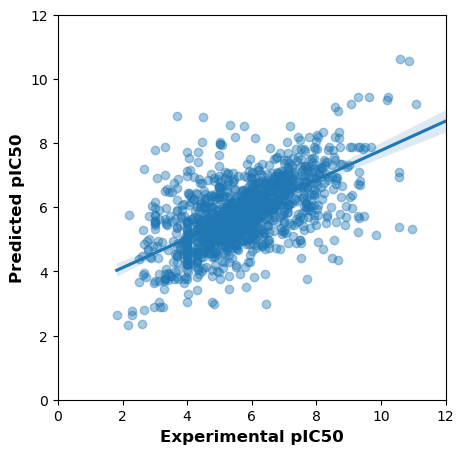

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#comparing predicted y values form x_test from actual y_test values to see accuracy (more diagonal down the origin, more accurate)
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show #Slanted from the origin, seems to be somewhat predictive but not ideal enough to call it close to a good model.

# help(sns.regplot) #if needed

### Part 5: Fitting data on other ML models

##### Determining which models provide the greatest predictive power

In [7]:
import lazypredict 
#Lazy predict basically contains many ML models that you can use through a single function. This is pretty simple (lazy) but can give a good general idea on what models work best in predicting the drug activity.
#All the models use default parameters, which is again why I say its a nice peek into the window rather than an actual prediction.
from lazypredict.Supervised import LazyRegressor 

clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
# models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)



 74%|███████▍  | 31/42 [00:50<00:09,  1.15it/s]

In [ ]:
print(
    predictions_train,
    predictions_test
)

In [ ]:
#Plotting
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))



In [ ]:
# Bar plot of RMSE values

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

In [ ]:
# Bar plot of calculation time

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

### Interpretation

##### 